In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# loading the data

df = pd.read_csv("data/data-Bz-HCB-1500.csv")

print('Shape: ',df.shape)
df.head(4)

Shape:  (1500, 4)


,trajectory,inter energy,intra energy,dissociation time
0,1,18.077,201.499,2.87
1,2,15.919,203.714,0.84
2,3,28.585,191.200,0.79
3,4,24.877,194.642,2.54


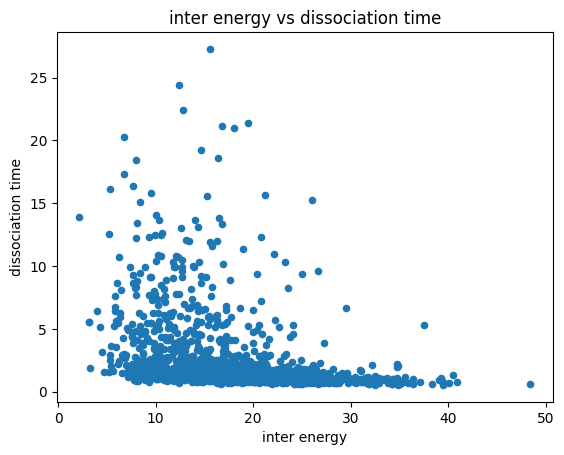

inter energy
[18.077 15.919 28.585 ...  6.181 13.406  2.192]
dissociation time
[ 2.86999994  0.83999998  0.78999998 ...  2.20999995  1.16999997
 13.89999969]


In [3]:
df.plot(x=''+df.columns[1], y=''+df.columns[3], kind='scatter')
plt.xlabel(''+df.columns[1])
plt.ylabel(''+df.columns[3])
plt.title(''+df.columns[1]+' vs '+df.columns[3])
plt.show()

print(df.columns[1])
print(df[df.columns[1]].values)

print(df.columns[3])
print(df[df.columns[3]].values)

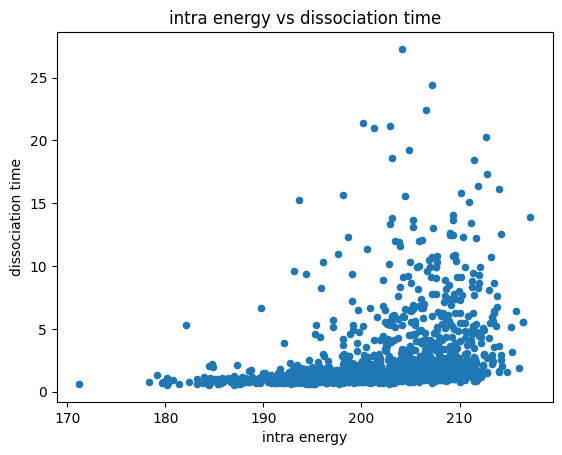

intra energy
[201.499 203.714 191.2   ... 213.3   205.947 217.221]
dissociation time
[ 2.86999994  0.83999998  0.78999998 ...  2.20999995  1.16999997
 13.89999969]


In [4]:
df.plot(x=''+df.columns[2], y=''+df.columns[3], kind='scatter')
plt.xlabel(''+df.columns[2])
plt.ylabel(''+df.columns[3])
plt.title(''+df.columns[2]+' vs '+df.columns[3])
plt.show()

print(df.columns[2])
print(df[df.columns[2]].values)

print(df.columns[3])
print(df[df.columns[3]].values)

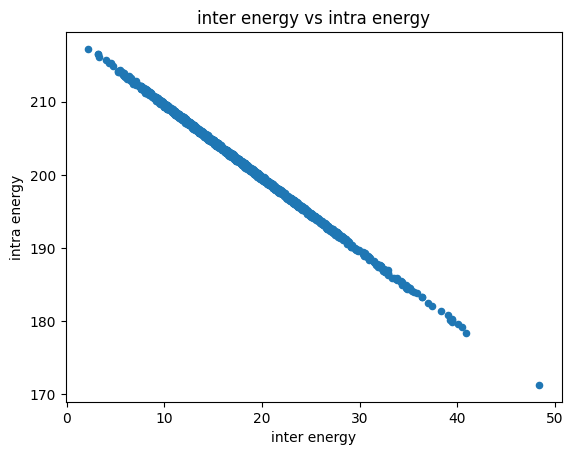

inter energy
[18.077 15.919 28.585 ...  6.181 13.406  2.192]
intra energy
[201.499 203.714 191.2   ... 213.3   205.947 217.221]
corr_pearson:  -0.9997077135316395


In [5]:
df.plot(x=''+df.columns[1], y=''+df.columns[2], kind='scatter')
plt.xlabel(''+df.columns[1])
plt.ylabel(''+df.columns[2])
plt.title(''+df.columns[1]+' vs '+df.columns[2])
plt.show()

print(df.columns[1])
print(df[df.columns[1]].values)

print(df.columns[2])
print(df[df.columns[2]].values)

corr_pearson  = df[df.columns[1]].corr(df[df.columns[2]], method='pearson')
print("corr_pearson: ", corr_pearson)

X shape:  (1500, 2)
      inter energy  dissociation time
0           18.077               2.87
1           15.919               0.84
2           28.585               0.79
3           24.877               2.54
4           12.201               2.00
...            ...                ...
1495        27.526               0.86
1496        23.545               0.93
1497         6.181               2.21
1498        13.406               1.17
1499         2.192              13.90

[1500 rows x 2 columns]


/Users/jerry/Documents/vscode/chemistry/.cvenv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jerry/Documents/vscode/chemistry/.cvenv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jerry/Documents/vscode/chemistry/.cvenv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jerry/Documents/vscode/chemistry/.cvenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/jerry/Documents/vscode/chemistry/.cvenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/jerry/Documents/vscode/chemistry/.cvenv/lib/python3.9/site-packages/sklear

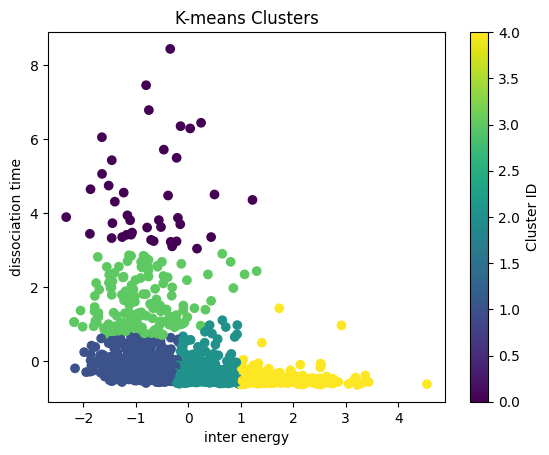

In [11]:
# clustering the data

# Use only coordinate columns (exclude label column)
X = df[[df.columns[1], df.columns[3]]]

print("X shape: ", X.shape)
print(X)

# Scale features (recommended for K-Means)
X_scaled = StandardScaler().fit_transform(X)

# Choose number of clusters (k)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Fit + predict clusters
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(
    X_scaled[:, 0],   # first coordinate
    X_scaled[:, 1],   # second coordinate
    c=df['cluster'],
)
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[3])
plt.title("K-means Clusters")
plt.colorbar(label="Cluster ID")
plt.show()

In [ ]:
# clustering the data

# Use only coordinate columns (exclude label column)
X = df[[df.columns[1], df.columns[3]]]

# Scale features (recommended for K-Means)
X_scaled = StandardScaler().fit_transform(X)

# Choose number of clusters (k)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Fit + predict clusters
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(
    X_scaled[:, 0],   # first coordinate
    X_scaled[:, 1],   # second coordinate
    c=df['cluster'],
)
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[3])
plt.title("K-means Clusters")
plt.colorbar(label="Cluster ID")
plt.show()

/Users/jerry/Documents/vscode/chemistry/.cvenv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jerry/Documents/vscode/chemistry/.cvenv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jerry/Documents/vscode/chemistry/.cvenv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jerry/Documents/vscode/chemistry/.cvenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/jerry/Documents/vscode/chemistry/.cvenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/jerry/Documents/vscode/chemistry/.cvenv/lib/python3.9/site-packages/sklear

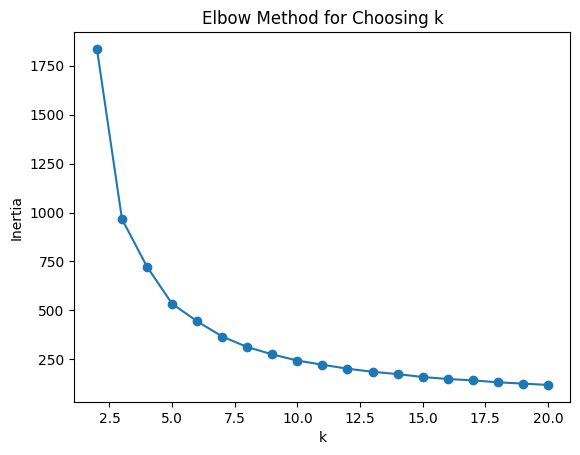

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
K = range(2, 21)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(list(K), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method for Choosing k")
plt.show()


In [8]:
df_new = df.iloc[:, [1, 3]]
df_new.head()

,inter energy,dissociation time
0,18.077,2.87
1,15.919,0.84
2,28.585,0.79
3,24.877,2.54
4,12.201,2.00


In [9]:
df_new_sorted = df_new.sort_values(by=df_new.columns[0])
df_new_sorted[df_new.columns[1]]
df_new_sorted.head()

,inter energy,dissociation time
1499,2.192,13.90
627,3.195,5.55
612,3.212,5.54
1309,3.323,1.86
97,4.032,6.46


<Figure size 1600x200 with 0 Axes>

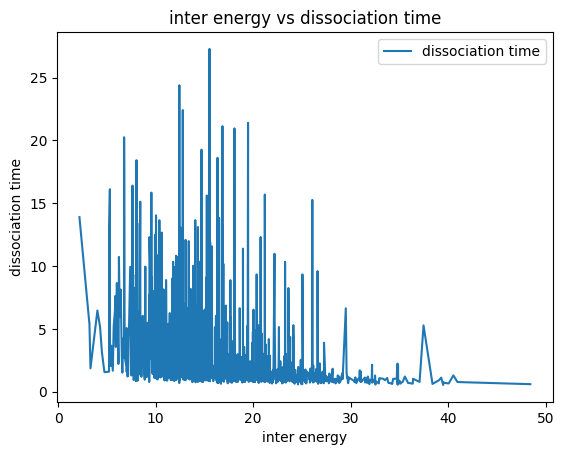

In [10]:
plt.figure(figsize=(16, 2))   # (width, height) in inches

df_new_sorted.plot(
    x=df_new.columns[0],
    y=df_new.columns[1],
    kind='line'
)

plt.xlabel(df_new.columns[0])
plt.ylabel(df_new.columns[1])
plt.title(df_new.columns[0] + ' vs ' + df_new.columns[1])
plt.show()